In [6]:
import pandas as pd

from apsimNGpy.core.base_data import load_default_simulations
from apsimNGpy.core.core import APSIMNG
_apsim = load_default_simulations(crop = 'Maize', simulations_object=False)
apsim = APSIMNG(_apsim)
# create experiment initiate the experiment
apsim.create_experiment(permutation=True, verbose=False)# by default it is a permutation experiment

In [ ]:
apsim.add_factor(specification="[Fertilise at sowing].Script.Amount = 0 to 200 step 20", factor_name='Nitrogen')
apsim.add_factor(specification="[Sow using a variable rule].Script.Population =4 to 10 step 2", factor_name='Population')


In [11]:
apsim.run(report_name='Report') 

In [12]:
apsim.results

,SimulationName,SimulationID,CheckpointID,CheckpointName,Clock.Today,Experiment,Maize.AboveGround.N,Maize.AboveGround.Wt,Maize.Grain.N,Maize.Grain.NumberFunction,Maize.Grain.Size,Maize.Grain.Total.Wt,Maize.Grain.Wt,Maize.Phenology.CurrentStageName,Maize.Total.Wt,Nitrogen,Population,Yield,Zone
0,ExperimentNitrogen0Population10,33,1,Current,1991-05-28,Experiment,7.557,1061.484,5.157,3550.151,0.124,438.523,438.523,HarvestRipe,1149.863,0,10,4385.230,Field
1,ExperimentNitrogen0Population10,33,1,Current,1992-04-09,Experiment,0.379,60.550,0.000,0.000,0.000,0.000,0.000,HarvestRipe,63.317,0,10,0.000,Field
2,ExperimentNitrogen0Population10,33,1,Current,1993-03-16,Experiment,1.593,253.212,0.985,723.778,0.134,96.647,96.647,HarvestRipe,279.508,0,10,966.473,Field
3,ExperimentNitrogen0Population10,33,1,Current,1994-03-15,Experiment,1.097,148.141,0.856,403.927,0.205,82.705,82.705,HarvestRipe,151.993,0,10,827.046,Field
4,ExperimentNitrogen0Population10,33,1,Current,1995-04-04,Experiment,4.910,785.159,3.030,3012.005,0.098,296.098,296.098,HarvestRipe,869.135,0,10,2960.977,Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,ExperimentNitrogen80Population8,27,1,Current,1996-03-15,Experiment,9.282,1413.514,6.965,3026.456,0.217,656.531,656.531,HarvestRipe,1519.247,80,8,6565.313,Field
436,ExperimentNitrogen80Population8,27,1,Current,1997-04-05,Experiment,9.218,1036.280,3.693,923.010,0.300,276.689,276.689,HarvestRipe,1192.521,80,8,2766.890,Field
437,ExperimentNitrogen80Population8,27,1,Current,1998-03-06,Experiment,8.863,972.583,4.376,1061.822,0.306,325.148,325.148,HarvestRipe,1101.867,80,8,3251.475,Field
438,ExperimentNitrogen80Population8,27,1,Current,1999-04-10,Experiment,16.092,1962.350,11.719,3219.236,0.286,919.139,919.139,HarvestRipe,2126.469,80,8,9191.387,Field


In [13]:
apsim.results.groupby('Nitrogen')['Yield'].mean()

Nitrogen
0      1861.229275
20     2567.603025
40     3272.925400
60     3991.647400
80     4745.264425
100    5328.315600
120    5671.880500
140    5677.515725
160    5649.098450
180    5622.566750
200    5607.456075
Name: Yield, dtype: float64

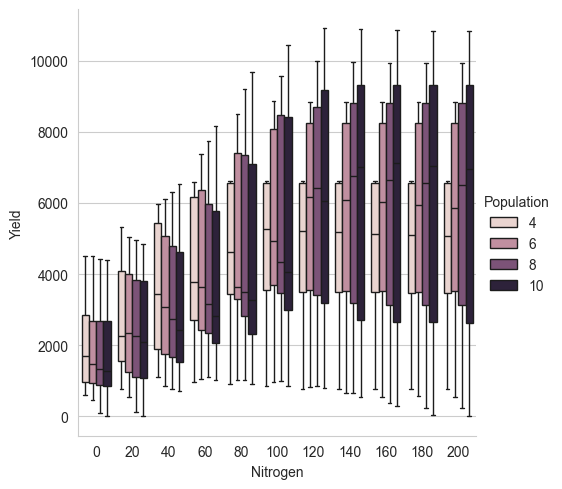

In [14]:
import seaborn as sns
sns.set_style('whitegrid')
from matplotlib import pyplot as plt
df= apsim.results 
df[['population' ]] = pd.Categorical(['Population'])
sns.catplot(x='Nitrogen', y='Yield', hue='Population', data=df, kind='box', )
plt.show()